#  IA para Redes de Suministro 

👤 **Autor:** John Leonardo Vargas Mesa  
🔗 [LinkedIn](https://www.linkedin.com/in/leonardovargas/) | [GitHub](https://github.com/LeStark)  

## 📂 Repositorio en GitHub  
- 📓 **Notebooks:** [Acceder aquí](https://github.com/LeStark/Cursos/tree/main/An%C3%A1lisis%20predictivo%20para%20toma%20de%20decisiones%20RRHH)  
- 📑 **Data sets:** [Acceder aquí](https://github.com/LeStark/Cursos/tree/main/Data/RRHH)  
---

# 📘 Notebook 1 – Introducción al Machine Learning en Cadenas de Suministro

En este notebook trabajaremos con datasets adaptados que representan distintos procesos dentro de una cadena de suministro: demanda de productos, inventarios y entregas.  

Este será nuestro punto de partida para aprender a **explorar, preparar y modelar datos** con el objetivo de apoyar la toma de decisiones logísticas mediante Machine Learning.

### 📂 Estructura del Dataset

El dataset contiene información simulada de operaciones logísticas, con variables como:

- **Día de la semana**: momento del ciclo semanal en el que se registra la demanda.  
- **Promoción activa**: indicador binario sobre campañas de descuento.  
- **Temperatura**: variable climática que puede afectar el consumo.  
- **Ventas pasadas**: histórico inmediato de la cantidad vendida.  
- **Demanda**: variable objetivo (número de unidades a predecir).  

En otros casos de clasificación, se incluyen variables como:  
- **Distancia de entrega**: kilómetros entre bodega y cliente.  
- **Condiciones climáticas**: lluvia, nieve, soleado.  
- **Tráfico**: nivel de congestión reportado.  
- **Entrega tardía**: variable objetivo (sí/no).  

### 🎯 Objetivos del Notebook
- Realizar un **análisis exploratorio (EDA)** de las variables relacionadas con la logística y la demanda.  
- Entrenar modelos de **regresión** para la predicción de demanda.  
- Entrenar modelos de **clasificación** para predecir entregas tardías.  
- Visualizar métricas de desempeño y discutir aplicaciones en la vida real.  

### 🛠️ Herramientas a utilizar
- **pandas** y **numpy**: manipulación de datos.  
- **matplotlib** y **seaborn**: visualización exploratoria.  
- **scikit-learn**: construcción de modelos de regresión y clasificación.  

Al finalizar este notebook, contarás con un dataset preparado y modelos básicos entrenados, lo que te permitirá comprender cómo aplicar Machine Learning en problemas reales de cadenas de suministro.


## Diccionario de Variables – Evaluación de Proveedores

- **Tiempo_entrega_dias**  
  Número promedio de días que tarda el proveedor en completar una entrega.  
  *Un menor valor indica mayor eficiencia logística.*  

- **Confiabilidad_entregas**  
  Medida de la consistencia en los despachos a tiempo y sin errores.  
  *Un valor alto refleja proveedores más confiables y estables.*  

- **Costos_de_transacción**  
  Costos asociados a la relación con el proveedor, incluyendo trámites administrativos, gestión de órdenes y coordinación logística.  
  *Un menor costo significa relaciones más ágiles y económicas.*  

- **Defectos_por_millón**  
  Indicador de calidad basado en el número de defectos detectados por cada millón de unidades entregadas.  
  *Un valor bajo señala alta calidad en los productos o servicios suministrados.*  

- **categoria_proveedor**  
  Clasificación del proveedor según su rol estratégico dentro de la cadena:  
  - **Proveedor Estratégico**: Alta prioridad, fundamental para la operación.  
  - **Proveedor Regular**: Desempeño aceptable, apoyo frecuente en la operación.  
  - **Proveedor Ocasional**: Uso esporádico, bajo impacto estratégico.  


In [1]:
# Librerías principales para el proyecto

# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Utilidades matemáticas
import math

# Manejo de advertencias (para ocultar mensajes innecesarios)
import warnings
warnings.filterwarnings('ignore')

# Preprocesamiento de datos
from sklearn.preprocessing import LabelEncoder    # Codificación de variables categóricas
from sklearn.preprocessing import StandardScaler  # Estandarización de variables numéricas

# División de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Modelado con K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Evaluación de modelos
from sklearn.metrics import (
    confusion_matrix,          # Matriz de confusión
    ConfusionMatrixDisplay,    # Visualización de la matriz de confusión
    classification_report,     # Métricas de precisión, recall y F1
    accuracy_score             # Exactitud global
)

# Guardado y carga de modelos entrenados
import joblib


In [2]:
# 📥 Carga del Dataset de Evaluación de Proveedores
# ------------------------------------------------
# En esta celda cargamos un dataset adaptado del famoso Iris,
# pero reinterpretado en el contexto de cadenas de suministro.
#
# El archivo está almacenado en un repositorio de GitHub y lo
# leemos directamente con pandas usando pd.read_csv().
# Luego mostramos las primeras filas para confirmar que se cargó bien
# y entender la estructura de las variables.

url = "https://raw.githubusercontent.com/LeStark/Cursos/refs/heads/main/00%20-%20Data/02%20-%20SC/iris_evaluacion_proveedores.csv"
data = pd.read_csv(url)

#Mostrar la información del dataset
data.info()

# Mostrar las primeras 5 filas del dataset
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tiempo_entrega_dias     150 non-null    float64
 1   Confiabilidad_entregas  150 non-null    float64
 2   Costos_de_transacción   150 non-null    float64
 3   Defectos_por_millón     150 non-null    float64
 4   categoria_proveedor     150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,Tiempo_entrega_dias,Confiabilidad_entregas,Costos_de_transacción,Defectos_por_millón,categoria_proveedor
0,5.1,3.5,1.4,0.2,Proveedor Estratégico
1,4.9,3.0,1.4,0.2,Proveedor Estratégico
2,4.7,3.2,1.3,0.2,Proveedor Estratégico
3,4.6,3.1,1.5,0.2,Proveedor Estratégico
4,5.0,3.6,1.4,0.2,Proveedor Estratégico


## Análisis Exploratorio de Datos (EDA)

El **Análisis Exploratorio de Datos (EDA, por sus siglas en inglés)** es una etapa fundamental antes de aplicar cualquier modelo de Machine Learning.  
Su objetivo es **comprender la estructura de los datos, identificar patrones y detectar posibles problemas** como valores atípicos, distribuciones sesgadas o correlaciones entre variables.  

En este notebook, el EDA se centra en las siguientes tareas:

### 1. Revisión inicial del dataset
- Verificamos el número de registros y variables.  
- Inspeccionamos los primeros registros con `head()` para asegurarnos de que los datos se cargaron correctamente.  
- Revisamos los tipos de datos (numéricos, categóricos) y posibles valores faltantes.

### 2. Distribución de las variables numéricas
- Mediante histogramas, KDE (densidad) y boxplots observamos cómo se distribuyen variables como:
  - **Tiempo_entrega_dias**  
  - **Confiabilidad_entregas**  
  - **Costos_de_transacción**  
  - **Defectos_por_millón**  
- Esto nos permite detectar valores extremos y diferencias entre categorías de proveedores.

### 3. Análisis de la variable categórica
- Analizamos la proporción de cada clase de `categoria_proveedor` (*Estratégico, Regular, Ocasional*).  
- Esta información es clave para identificar si el dataset está **balanceado** o si habrá que aplicar técnicas de balanceo antes del modelado.

### 4. Relaciones entre variables
- Utilizamos gráficos de dispersión y pairplots para observar cómo se agrupan los proveedores en el espacio de las variables.  
- Calculamos correlaciones entre variables numéricas para identificar redundancias o relaciones fuertes que influyan en los modelos.

In [3]:
# Seleccionar solo variables numéricas
numeric_df = data.select_dtypes(include=["int64", "float64"])
# 1. Estadísticas descriptivas
print("📊 Estadísticas descriptivas:")
display(numeric_df.describe())

📊 Estadísticas descriptivas:


,Tiempo_entrega_dias,Confiabilidad_entregas,Costos_de_transacción,Defectos_por_millón
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


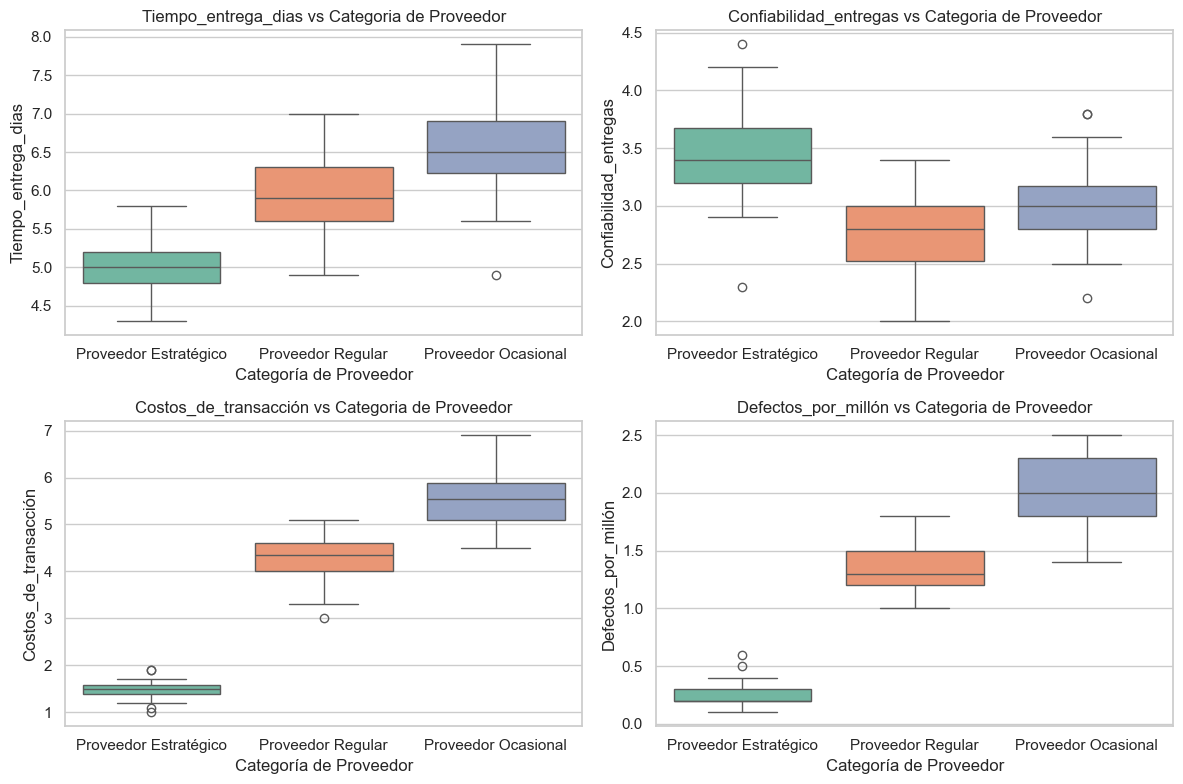

In [5]:
# Configuración de estilo
sns.set(style="whitegrid")

# Variables numéricas
variables = data.columns.drop("categoria_proveedor").tolist()

# Crear grid de 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Iterar sobre las variables y ejes
for var, ax in zip(variables, axes.flatten()):
    sns.boxplot(data=data, x="categoria_proveedor", y=var, ax=ax, palette="Set2")
    ax.set_title(f"{var} vs Categoria de Proveedor", fontsize=12)
    ax.set_xlabel("Categoría de Proveedor")
    ax.set_ylabel(var)

plt.tight_layout()
plt.show()


### Análisis de Boxplots – Variables vs Categoría de Proveedor

Los boxplots permiten comparar la distribución de cada variable de evaluación de proveedores según la categoría asignada (*Estratégico, Regular u Ocasional*).  

#### Tiempo_entrega_dias
- **Proveedores Estratégicos** presentan tiempos de entrega más bajos y consistentes (mediana cercana a 5 días).  
- **Proveedores Ocasionales** son los más lentos, con tiempos entre 6 y 8 días.  
- Esto refleja que la eficiencia logística es un diferenciador claro para la categoría estratégica.  

#### Confiabilidad_entregas
- Los **Estratégicos** tienen mayor confiabilidad, con una mediana superior a 3.2.  
- Los **Regulares** muestran mayor dispersión y menor nivel de cumplimiento.  
- Los **Ocasionales** se ubican en un punto intermedio, aunque con valores menos estables.  

#### Costos_de_transacción
- Los **Estratégicos** destacan por tener los costos más bajos (mediana cercana a 1.5).  
- Los **Regulares** duplican estos costos, y los **Ocasionales** los triplican.  


### Uso del Pair Plot para Análisis Exploratorio

El **pair plot** es una herramienta gráfica que nos permite visualizar, en una sola figura, la relación entre todas las variables numéricas de un dataset.  

En este caso, lo utilizamos para analizar cómo se relacionan las variables de evaluación de proveedores con la **categoría de proveedor** (*Estratégico, Regular u Ocasional*).  

- **En la diagonal**: se muestran las distribuciones de cada variable mediante curvas de densidad (**KDE**). Estas curvas nos permiten observar si los proveedores se agrupan de manera distinta en cada variable individual.  
- **Fuera de la diagonal**: aparecen diagramas de dispersión entre pares de variables. Al incluir el parámetro `hue="categoria_proveedor"`, cada punto se colorea según la categoría, lo que facilita identificar separaciones o solapamientos entre grupos.  

 Gracias a este gráfico, podemos responder preguntas como:  
- ¿Qué variables separan con mayor claridad a los proveedores estratégicos de los demás?  
- ¿Existen combinaciones de variables que permitan distinguir mejor a proveedores regulares de ocasionales?  
- ¿Hay superposición significativa entre categorías en ciertos atributos?  


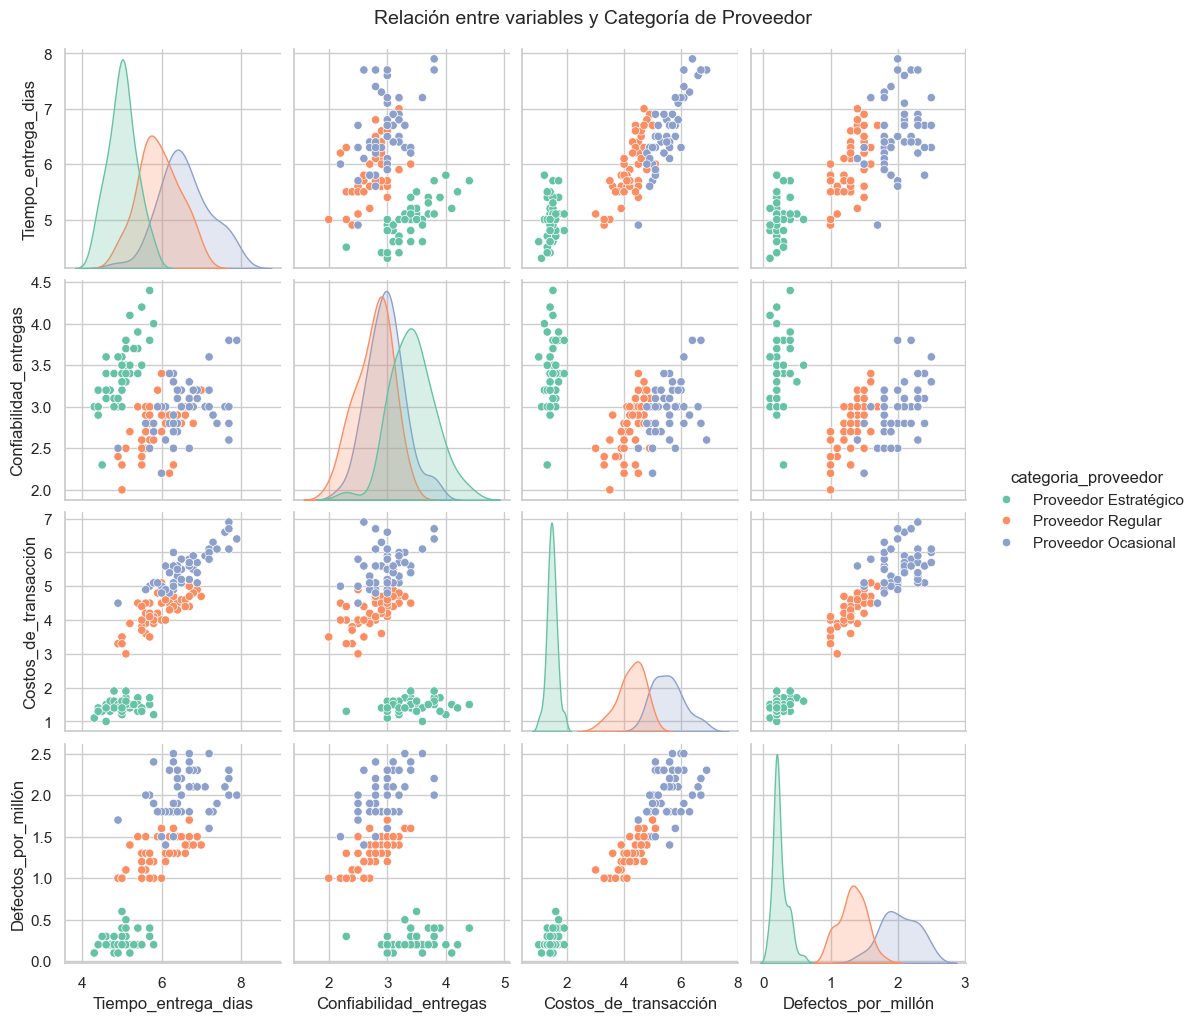

In [ ]:

# Pairplot con densidades KDE en la diagonal
sns.pairplot(
    data, 
    vars=["Tiempo_entrega_dias", "Confiabilidad_entregas", 
          "Costos_de_transacción", "Defectos_por_millón"],
    hue="categoria_proveedor", 
    diag_kind="kde", 
    palette="Set2",
    #corner=True
)

plt.suptitle("Relación entre variables y Categoría de Proveedor", y=1.02, fontsize=14)
plt.show()


#### Observaciones clave

1. **Separación clara de Proveedores Estratégicos**
   - Los proveedores estratégicos (verde) se distinguen con facilidad en casi todas las variables.
   - Tienen tiempos de entrega más bajos, menores costos de transacción y defectos casi nulos.
   - Esto genera un clúster compacto y separado en las gráficas de dispersión.

2. **Superposición entre Proveedores Regulares y Ocasionales**
   - Los proveedores regulares (naranja) y ocasionales (azul) muestran un solapamiento considerable en las variables.
   - Sin embargo, los ocasionales tienden a concentrarse en los valores más altos de costos de transacción, defectos por millón y tiempo de entrega.

3. **Relaciones entre variables**
   - Existe una **correlación positiva** marcada entre:
     - *Costos_de_transacción* y *Defectos_por_millón*: a mayor costo, también se observan más defectos.
     - *Tiempo_entrega_dias* y *Costos_de_transacción*: proveedores con entregas más lentas también generan mayores costos.
   - La variable *Confiabilidad_entregas* ayuda a separar estratégicos de los demás, pero menos a regulares de ocasionales.

4. **Distribuciones univariadas (KDE en la diagonal)**
   - Las curvas de densidad confirman que:
     - Los **estratégicos** se concentran en valores bajos en todas las métricas de costo, tiempo y defectos.
     - Los **ocasionales** presentan distribuciones desplazadas hacia valores altos, especialmente en *Defectos_por_millón*.
     - Los **regulares** se ubican en un punto intermedio, pero con mayor dispersión.



## Preparación de los Datos para el Entrenamiento

Antes de entrenar un modelo de Machine Learning, es fundamental preparar los datos de manera adecuada.  
En este notebook trabajaremos dos aspectos clave:

### 1. Codificación de variables categóricas
Los algoritmos de Machine Learning de `scikit-learn` solo trabajan con variables numéricas.  
Por esta razón, es necesario transformar la variable categórica `categoria_proveedor` en números que representen cada clase.  

Existen dos estrategias comunes:
- **Label Encoding**: asigna un número entero a cada categoría (0, 1, 2…). Es útil para problemas de clasificación multiclase como este.  
- **One-Hot Encoding**: crea variables binarias (0/1) para cada categoría. Es preferible cuando no queremos introducir un orden artificial entre categorías.

En este caso utilizaremos **Label Encoding**, ya que nuestra variable objetivo es la clase de proveedor.

### 2. Estandarización de variables numéricas
Las variables numéricas (ej. tiempo de entrega, costos de transacción) tienen escalas diferentes.  
La estandarización permite que todas estén en una escala comparable, con media 0 y desviación estándar 1.  
Esto evita que atributos con valores más grandes dominen el entrenamiento del modelo.  

Aunque algunos algoritmos como los árboles no necesitan estandarización, otros como regresión logística, SVM o redes neuronales sí se benefician de esta normalización.


In [13]:
# Codificación de la variable categórica
# -----------------------------------------
# En esta celda convertimos la variable categórica "categoria_proveedor"
# en valores numéricos para que pueda ser utilizada por los modelos de Machine Learning.

# 1️ Inicializamos el codificador de scikit-learn
le = LabelEncoder()

# 2️ Ajustamos el codificador a la variable y la transformamos en una nueva columna
#    - El método fit_transform() aprende las categorías únicas y las asigna a un número entero.
#    - Creamos la columna "categoria_proveedor_num" con los valores codificados.
data["categoria_proveedor_num"] = le.fit_transform(data["categoria_proveedor"])

# 3 Mostramos el mapeo exacto de categorías → números
#    Esto nos permite saber qué número corresponde a cada tipo de proveedor.
dict(zip(le.classes_, le.transform(le.classes_)))


{'Proveedor Estratégico': 0, 'Proveedor Ocasional': 1, 'Proveedor Regular': 2}

In [14]:
# 4️ Verificamos que la nueva columna se agregó correctamente
data.head()

,Tiempo_entrega_dias,Confiabilidad_entregas,Costos_de_transacción,Defectos_por_millón,categoria_proveedor,categoria_proveedor_num
0,5.1,3.5,1.4,0.2,Proveedor Estratégico,0
1,4.9,3.0,1.4,0.2,Proveedor Estratégico,0
2,4.7,3.2,1.3,0.2,Proveedor Estratégico,0
3,4.6,3.1,1.5,0.2,Proveedor Estratégico,0
4,5.0,3.6,1.4,0.2,Proveedor Estratégico,0


In [16]:
data = data.drop(columns=["categoria_proveedor"])
data.head()

KeyError: "['categoria_proveedor'] not found in axis"

## Estandarización de Variables Numéricas

En esta sección aplicamos **StandardScaler** de `scikit-learn` para llevar todas las variables numéricas a una misma escala.  
Este paso es importante porque muchos algoritmos de Machine Learning (ej. KNN, regresión logística, SVM) son sensibles a las diferencias de magnitud entre variables.  

El proceso se desarrolla en los siguientes pasos:

1. **Selección de variables numéricas**  
   Se extraen todas las columnas excepto la variable objetivo `categoria_proveedor_num`.  

2. **Inicialización del escalador**  
   Se crea una instancia de `StandardScaler()`, que transformará los datos aplicando la fórmula:  
   \[
   z = \frac{x - \mu}{\sigma}
   \]  
   donde \( \mu \) es la media y \( \sigma \) la desviación estándar de cada variable.  

3. **Ajuste y transformación**  
   Con `fit_transform()` se calcula la media y desviación estándar de cada variable, y luego se aplica la estandarización.  

4. **Reconstrucción del DataFrame**  
   Los valores escalados se convierten nuevamente en un `DataFrame`, conservando los nombres de columnas y el índice original.  

5. **Concatenación con la variable objetivo**  
   Finalmente, las variables estandarizadas se unen con la variable `categoria_proveedor_num` para formar el dataset final `data_final`.  

Este dataset estandarizado será el que usemos para entrenar y evaluar nuestros modelos de clasificación.  


In [ ]:

# Variables numéricas a estandarizar
features = data.drop(columns=[ "categoria_proveedor_num"]).columns.tolist()

# 1️ Inicializamos el escalador
scaler = StandardScaler()

# 2️ Ajustamos el escalador a los datos y transformamos las variables
data_scaled = scaler.fit_transform(data[features])

# 3️ Convertimos el resultado nuevamente a DataFrame
#    Manteniendo los mismos nombres de columnas y el índice original
data_scaled = pd.DataFrame(data_scaled, 
                           columns=features, 
                           index=data.index)

# 4️ Concatenamos las variables estandarizadas con el resto del dataset
data_final = pd.concat([data_scaled, data[[ "categoria_proveedor_num"]]], axis=1)

# 5️ Revisamos las primeras filas para comprobar que todo esté correcto
data_final.head()


,Tiempo_entrega_dias,Confiabilidad_entregas,Costos_de_transacción,Defectos_por_millón,categoria_proveedor_num
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


##  Separación de los datos en entrenamiento y prueba

Una vez que los datos están preparados y estandarizados, el siguiente paso es dividirlos en dos conjuntos:  

- **Conjunto de entrenamiento (train):** usado para ajustar el modelo y permitirle "aprender" a partir de los datos.  
- **Conjunto de prueba (test):** usado para evaluar el desempeño del modelo en datos nuevos que no vio durante el entrenamiento.  

### 🔹 Pasos realizados en la celda

1. **Definición de variables predictoras y objetivo**  
   - `X` contiene todas las variables numéricas (predictoras).  
   - `y` contiene la variable objetivo `categoria_proveedor_num`, que representa la clase de proveedor.  

2. **División de los datos con `train_test_split`**  
   - `test_size=0.2` → el 20% de los datos se reserva para prueba y el 80% para entrenamiento.  
   - `random_state=16` → asegura que la partición sea reproducible, es decir, siempre se obtendrá la misma división al ejecutar el código.  
   - `stratify=y` → mantiene la proporción original de las clases de proveedores en ambos conjuntos, evitando sesgos en el balance de categorías.  

3. **Revisión de tamaños**  
   Con `X_train.shape` y `X_test.shape` confirmamos cuántos registros quedaron en cada conjunto.  



 Esta separación es fundamental para validar que el modelo no solo se ajusta bien a los datos de entrenamiento, sino que también generaliza correctamente a datos nuevos.


In [21]:


# Definimos variables predictoras (X) y variable objetivo (y)
X = data_final.drop(columns=["categoria_proveedor_num"])

y = data_final["categoria_proveedor_num"]

# Separación en train y test
# test_size=0.2 → 20% de los datos para prueba, 80% para entrenamiento
# random_state=16 → asegura reproducibilidad de la partición
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=16, stratify=y
)

# Revisamos las dimensiones de los conjuntos resultantes
print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)


Tamaño entrenamiento: (120, 4)
Tamaño prueba: (30, 4)


##  Entrenamiento del modelo KNN

En esta celda entrenamos un modelo de **K-Nearest Neighbors (KNN)** utilizando la librería `scikit-learn`.  

###  ¿Qué es KNN?
KNN es un algoritmo de clasificación supervisada que asigna a una nueva observación la clase más común entre sus *k* vecinos más cercanos en el espacio de características.  
- "Vecinos" se definen a partir de la **distancia** entre puntos (generalmente Euclidiana).  
- El valor de **k** controla cuántos vecinos se consideran para decidir la clase final.  

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Ejemplo de predicción con el modelo KNN

En esta celda probamos el modelo entrenado con un **proveedor hipotético**, al que se le asignan valores para cada variable.  
El flujo es el siguiente:

1. Se definen los valores de entrada (tiempo de entrega, confiabilidad, costos y defectos).  
2. Se escalan con el mismo `StandardScaler` usado en el entrenamiento.  
3. El modelo **KNN** predice la categoría numérica del proveedor.  
4. Usamos el `LabelEncoder` para traducir esa predicción a su etiqueta original (*Estratégico, Regular u Ocasional*).  

De esta forma, podemos simular distintos escenarios y verificar cómo clasifica el modelo.


In [ ]:
# Ejemplo de predicción con el modelo KNN entrenado

# Definimos valores de entrada para un proveedor hipotético
ejemplo = np.array([[5.0,   # Tiempo de entrega (días)
                     3.5,   # Confiabilidad en entregas
                     2.0,   # Costos de transacción
                     1.0]]) # Defectos por millón

# Escalamos los datos con el mismo scaler usado en el entrenamiento
ejemplo_scaled = scaler.transform(ejemplo)

# Realizamos la predicción
prediccion = knn.predict(ejemplo_scaled)

# Convertimos la salida numérica a etiqueta
categoria_predicha = le.inverse_transform(prediccion)[0]

print("📊 Categoría de proveedor predicha:", categoria_predicha)


In [35]:
import ipywidgets as widgets
from ipywidgets import interact
import numpy as np

def predecir_proveedor(tiempo_entrega, confiabilidad, costos_transaccion, defectos_millon):
    # Construimos el array con los valores ingresados
    X_user = np.array([[tiempo_entrega, confiabilidad, costos_transaccion, defectos_millon]])
    X_user_scaled = scaler.transform(X_user)

    # Predicción con el modelo KNN entrenado
    prediction = knn.predict(X_user_scaled)
    predicted_label = le.inverse_transform(prediction)
    
    print("📊 Categoría de proveedor predicha:", predicted_label[0])

# Sliders interactivos para cada variable
interact(
    predecir_proveedor,
    tiempo_entrega=widgets.FloatSlider(min=1, max=10, step=0.5, value=5, description="Entrega (días)"),
    confiabilidad=widgets.FloatSlider(min=2, max=5, step=0.1, value=3, description="Confiabilidad"),
    costos_transaccion=widgets.FloatSlider(min=0.5, max=5, step=0.1, value=2, description="Costos"),
    defectos_millon=widgets.FloatSlider(min=0.1, max=3.5, step=0.1, value=1, description="Defectos")
)


interactive(children=(FloatSlider(value=5.0, description='Entrega (días)', max=10.0, min=1.0, step=0.5), Float…

<function __main__.predecir_proveedor(tiempo_entrega, confiabilidad, costos_transaccion, defectos_millon)>

## Evaluación del Modelo KNN

Después de entrenar el modelo KNN con `k=3`, es fundamental medir su desempeño para conocer qué tan bien clasifica a los proveedores en cada categoría.  
En esta celda realizamos la evaluación en tres pasos:

### 1️ Predicciones sobre el conjunto de prueba
- Con `knn.predict(X_test)` generamos las predicciones para las observaciones reservadas en el conjunto de prueba.  
- Estas predicciones se comparan con los valores reales (`y_test`) para calcular métricas de desempeño.  

### 2️ Matriz de confusión
- La **matriz de confusión** nos muestra el número de aciertos y errores por clase.  
- La diagonal principal indica las predicciones correctas, mientras que los valores fuera de la diagonal corresponden a errores de clasificación.  
- Utilizamos `ConfusionMatrixDisplay` para visualizarla de manera clara:  
  - Filas → valores reales (clases verdaderas).  
  - Columnas → valores predichos (clases asignadas por el modelo).  
- Esto nos permite detectar, por ejemplo, si el modelo confunde a proveedores **Regulares** con **Ocasionales**.  

### 3️ Métricas de desempeño
- **Accuracy**: proporción de predicciones correctas sobre el total.  
- **Precision**: de todos los proveedores que el modelo predijo como una categoría, ¿qué porcentaje realmente pertenece a esa clase?  
- **Recall (sensibilidad)**: de todos los proveedores que realmente pertenecen a una categoría, ¿qué porcentaje logró detectar el modelo?  
- **F1-score**: balance entre *precision* y *recall*, especialmente útil si las clases no están perfectamente balanceadas.  

El comando `classification_report` genera estas métricas para cada clase de proveedor (*Estratégico, Regular, Ocasional*) y un promedio general.


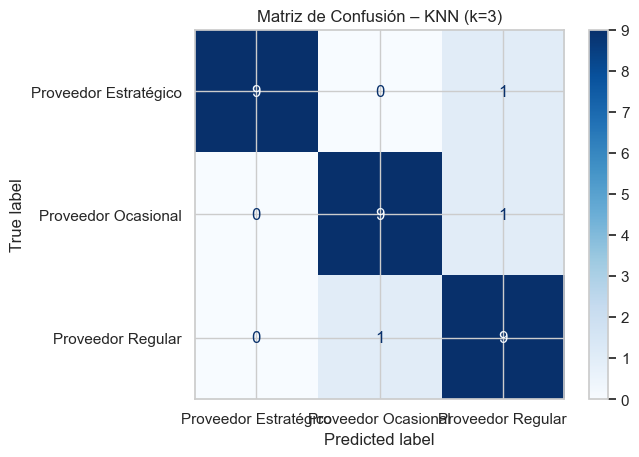

🔹 Accuracy: 0.9

 Reporte de Clasificación:

                       precision    recall  f1-score   support

Proveedor Estratégico       1.00      0.90      0.95        10
  Proveedor Ocasional       0.90      0.90      0.90        10
    Proveedor Regular       0.82      0.90      0.86        10

             accuracy                           0.90        30
            macro avg       0.91      0.90      0.90        30
         weighted avg       0.91      0.90      0.90        30



In [ ]:

#  1. Predicciones sobre el conjunto de prueba
y_pred = knn.predict(X_test)

#  2. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualización
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión – KNN (k=3)")
plt.show()

#  3. Métricas de desempeño
print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


In [ ]:

# Guardar los objetos entrenados
joblib.dump(knn, "knn_model.pkl")          # Modelo entrenado
joblib.dump(le, "label_encoder.pkl")       # Codificador de etiquetas
joblib.dump(scaler, "scaler.pkl")          # Estandarizador

print("Modelo, LabelEncoder y StandardScaler guardados correctamente.")


In [ ]:

# Cargar los objetos previamente guardados
knn_1 = joblib.load("knn_model.pkl")          # Modelo entrenado
le_1 = joblib.load("label_encoder.pkl")       # Codificador de etiquetas
scaler_1 = joblib.load("scaler.pkl")          # Estandarizador

print("Modelo, LabelEncoder y StandardScaler cargados correctamente.")
